The IMU log files column are, the Timestamp in ms, linear acceleration in x,y,z axis given in gravity unit, roll and pitch angle from accelerometer in degree, gyroscope x,y,z in degree/s, and magnetometer field strength in x,y,z axis in Gauss unit.


### Task 1a

From the measurement record log file which either is given to you or you collected yourselves, visualize the data. Read the Section 2.3.1 in order to understand what each column represents. What do you observe? Summarize what you have understood and write it down in your report.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib widget
%matplotlib inline

In [2]:
datapath = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/showfun/showfun_imu_1.csv'
dataset1 = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/dataset1/data/task1/imu_reading_task1.csv'

In [3]:
#load csv file
df = pd.read_csv(datapath)
#display first 5 rows
df.head()

,1699620677.17306566,-0.00585600,-0.00402600,0.99735000,0.16795676,0.16578184,0.09217250,-0.22942500,-0.08645000,0.36115171,0.89622917,-1.96696872
0,1.699621e+09,-0.000976,-0.010126,1.006012,-0.184473,-0.009690,-0.012828,0.015575,-0.08645,0.365975,0.895791,-1.967846
1,1.699621e+09,-0.000244,-0.008662,0.998326,-0.132902,0.095760,-0.187828,0.260575,0.26355,0.365975,0.895791,-1.967846
2,1.699621e+09,-0.002440,-0.007686,1.004914,-0.137250,0.115857,-0.047828,0.085575,0.36855,0.358959,0.896229,-1.961853
3,1.699621e+09,-0.001464,-0.004148,1.003328,0.239447,0.018055,-0.222828,0.155575,0.12355,0.355890,0.899006,-1.967407
4,1.699621e+09,-0.003538,-0.006344,1.004426,0.031218,0.136051,-0.152828,0.155575,-0.01645,0.355890,0.899006,-1.967407


In [4]:
# give names to columns
#linear acceleration in x,y,z axis given in gravity unit, roll and pitch angle from accelerometer in degree, gyroscope x,y,z in degree/s, and magnetometer field strength in x,y,z axis in Gauss unit.
df.columns = ['timestamp','acc_x','acc_y','acc_z','roll','pitch','gyro_x','gyro_y','gyro_z','mag_x','mag_y','mag_z']
#start timestamp from 0
df.timestamp = df.timestamp - df.timestamp[0]


In [5]:
df.head()

,timestamp,acc_x,acc_y,acc_z,roll,pitch,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,0.000000,-0.000976,-0.010126,1.006012,-0.184473,-0.009690,-0.012828,0.015575,-0.08645,0.365975,0.895791,-1.967846
1,0.061273,-0.000244,-0.008662,0.998326,-0.132902,0.095760,-0.187828,0.260575,0.26355,0.365975,0.895791,-1.967846
2,0.122443,-0.002440,-0.007686,1.004914,-0.137250,0.115857,-0.047828,0.085575,0.36855,0.358959,0.896229,-1.961853
3,0.183911,-0.001464,-0.004148,1.003328,0.239447,0.018055,-0.222828,0.155575,0.12355,0.355890,0.899006,-1.967407
4,0.245117,-0.003538,-0.006344,1.004426,0.031218,0.136051,-0.152828,0.155575,-0.01645,0.355890,0.899006,-1.967407


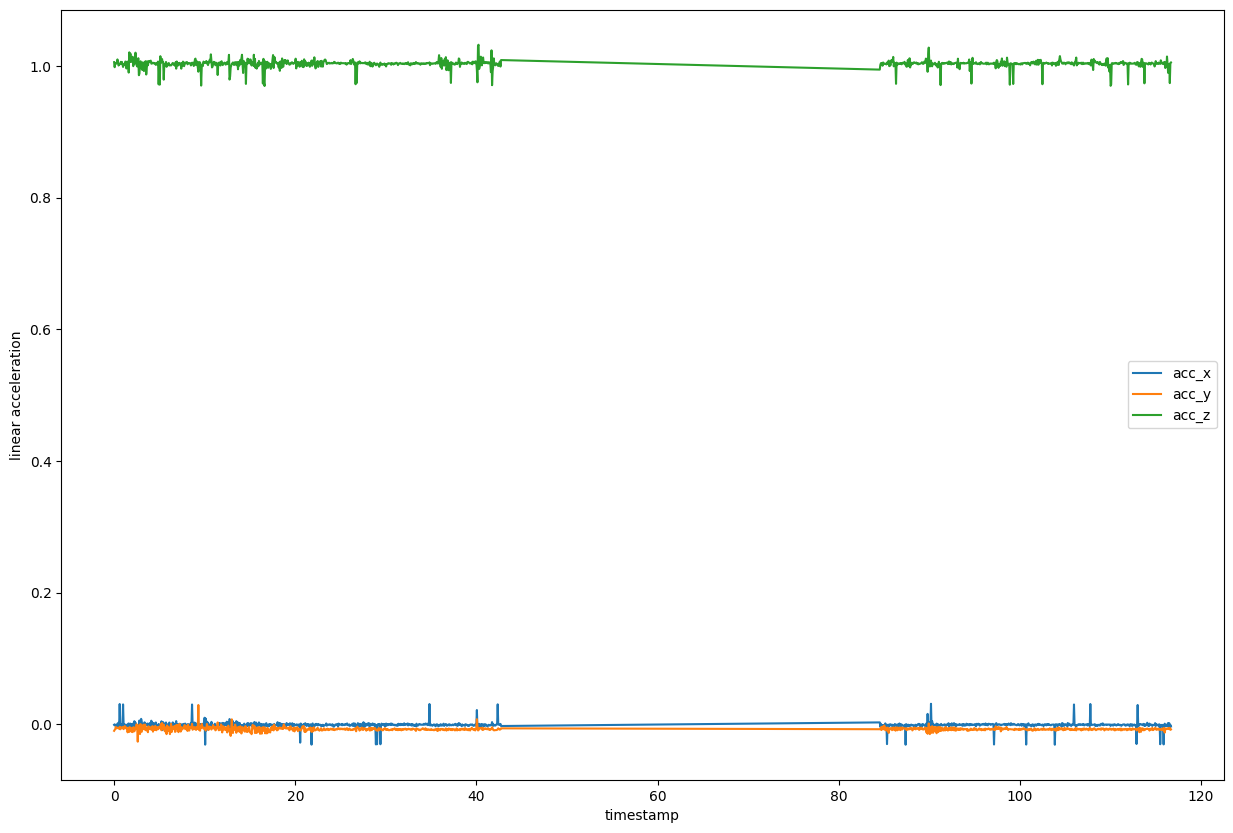

In [6]:
#plotting the data
# plt.figure(figsize=(20,10))
def plot_data(df):
    plt.figure(figsize=(15,10))
    plt.plot(df['timestamp'],df['acc_x'])
    plt.plot(df['timestamp'],df['acc_y'])   
    plt.plot(df['timestamp'],df['acc_z'])
    plt.xlabel('timestamp')
    plt.ylabel('linear acceleration')
    plt.legend(['acc_x','acc_y','acc_z'])
    plt.show()
plot_data(df)


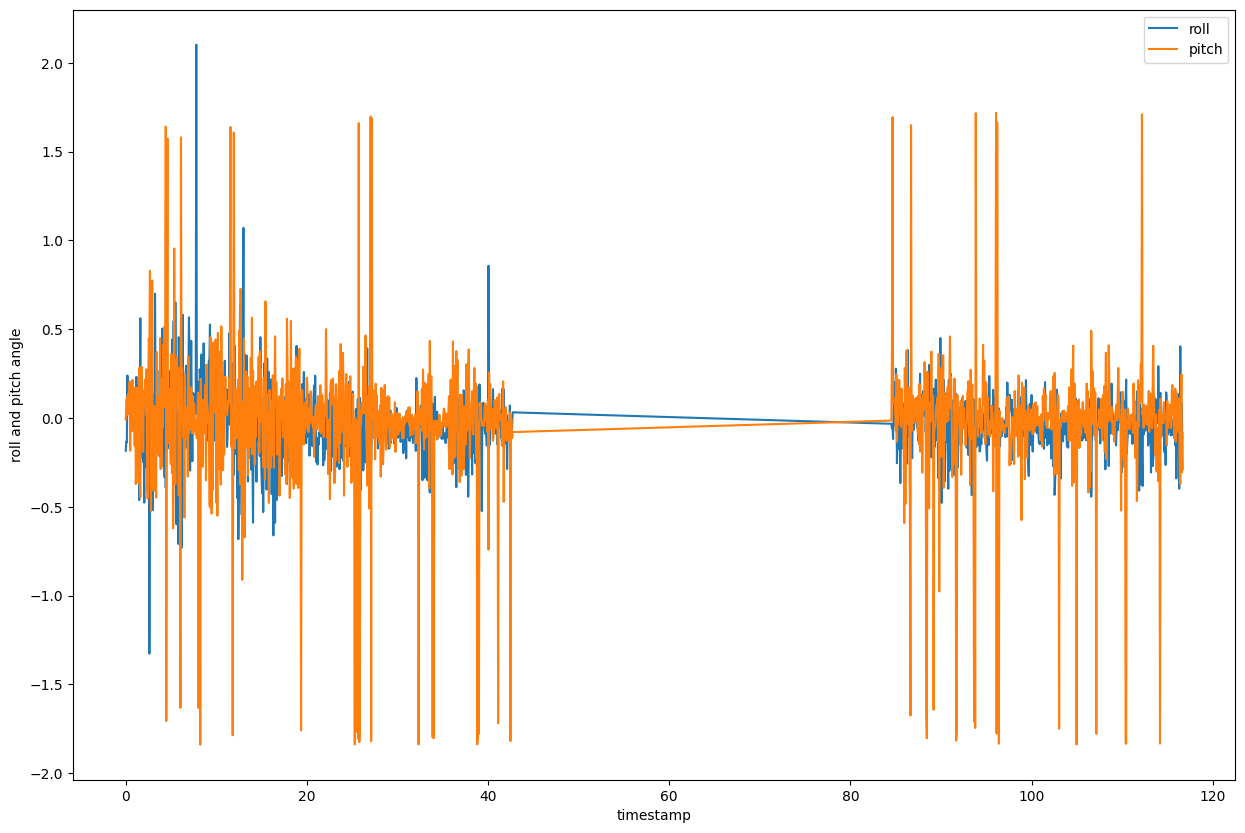

In [7]:
#visualize pitch , roll
def plot_pitch_roll(df):
    plt.figure(figsize=(15,10))
    plt.plot(df['timestamp'],df['roll'])
    plt.plot(df['timestamp'],df['pitch'])
    plt.xlabel('timestamp')
    plt.ylabel('roll and pitch angle')
    plt.legend(['roll','pitch'])
    plt.show()
plot_pitch_roll(df)

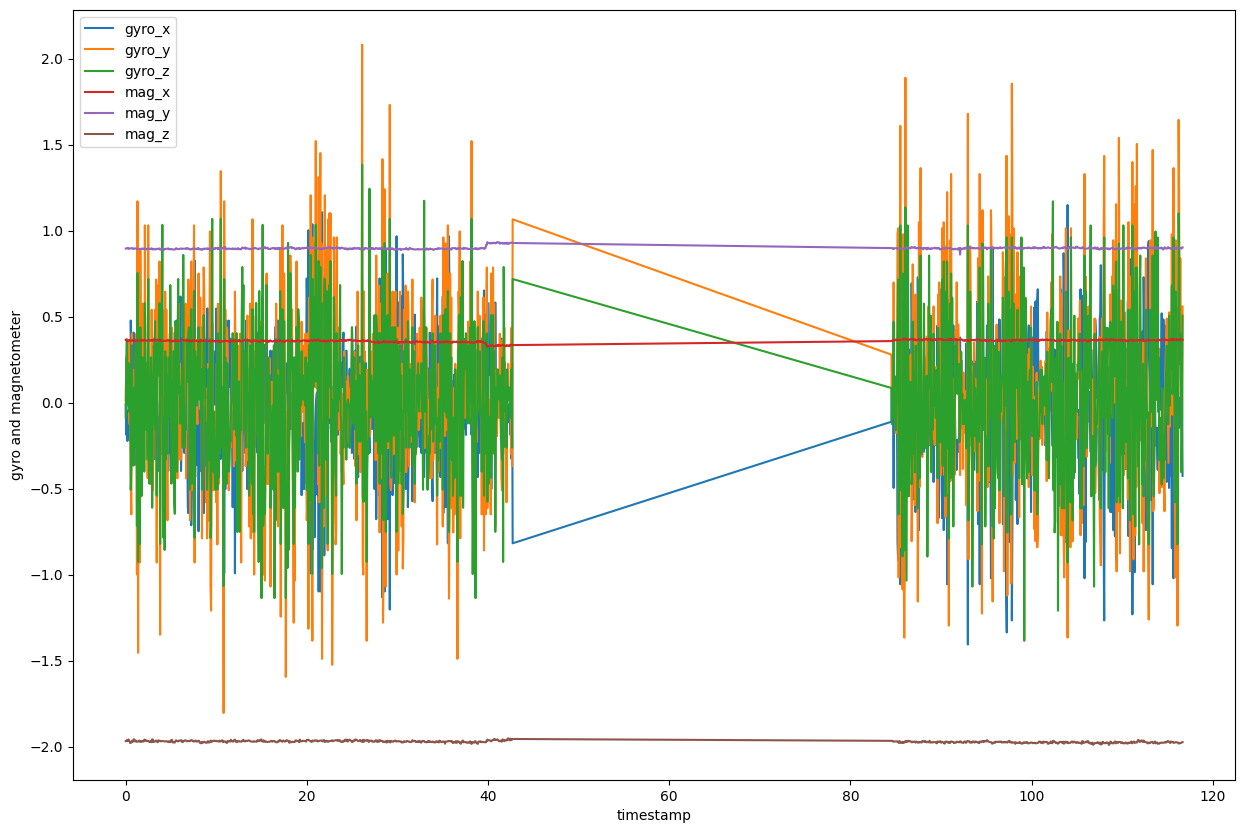

In [8]:
#plot the rest of the data
def plot_data_rest(df):
    plt.figure(figsize=(15,10))
    plt.plot(df['timestamp'],df['gyro_x'])
    plt.plot(df['timestamp'],df['gyro_y'])
    plt.plot(df['timestamp'],df['gyro_z'])
    plt.plot(df['timestamp'],df['mag_x'])
    plt.plot(df['timestamp'],df['mag_y'])
    plt.plot(df['timestamp'],df['mag_z'])
    plt.xlabel('timestamp')
    plt.ylabel('gyro and magnetometer')
    plt.legend(['gyro_x','gyro_y','gyro_z','mag_x','mag_y','mag_z'])
    plt.show()

plot_data_rest(df)


## Task1b




Task 1b. Determine the bias and variance of the gyroscope in the IMU sensors and write down the result in your report

In [9]:
# determine the variance of gyro
def gyro_variance(df):
    print('gyro variance x: ',np.var(df['gyro_x']))
    print('gyro variance y: ',np.var(df['gyro_y']))
    print('gyro variance z: ',np.var(df['gyro_z']))
# determine the bias of the gyro
def gyro_bias(df):
    print('gyro bias x: ',np.mean(df['gyro_x']))
    print('gyro bias y: ',np.mean(df['gyro_y']))
    print('gyro bias z: ',np.mean(df['gyro_z']))

gyro_variance(df)
gyro_bias(df)

gyro variance x:  0.12153781677116433
gyro variance y:  0.2899324942747135
gyro variance z:  0.1815447756157019
gyro bias x:  -0.019318343023255812
gyro bias y:  0.03588473837209302
gyro bias z:  0.004117761627906975


In [10]:


#determine the variance of 'acc_x','acc_y','acc_z'
variance = df[['acc_x','acc_y','acc_z']].var()
print('Variance of\n',variance)
#determin in the bias of 'acc_x','acc_y','acc_z'
bias = df[['acc_x','acc_y','acc_z']].mean()
print('Bias of \n',bias)



Variance of
 acc_x    0.000022
acc_y    0.000007
acc_z    0.000034
dtype: float64
Bias of 
 acc_x   -0.001216
acc_y   -0.007370
acc_z    1.003473
dtype: float64


In [11]:
#plot the bias of 'acc_x','acc_y','acc_z' along with the data
# plt.figure(figsize=(20,10))
# plt.plot(df['timestamp'],df['acc_x'])
# plt.plot(df['timestamp'],df['acc_y'])
# plt.plot(df['timestamp'],df['acc_z'])
# plt.plot(df['timestamp'],[bias[0]]*len(df['timestamp']))
# plt.plot(df['timestamp'],[bias[1]]*len(df['timestamp']))
# plt.plot(df['timestamp'],[bias[2]]*len(df['timestamp']))
# plt.xlabel('timestamp') 
# plt.ylabel('linear acceleration')
# plt.legend(['acc_x','acc_y','acc_z','bias_x','bias_y','bias_z'])
# plt.show()


## Task2

Plot the data from the measurement record log file. What did you observe? Determine the gain ki and bias bi for each body axis i = {x, y, z}. Write down the results in your report.

In [12]:
dataset2 = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/showfun/showfun_imu_task2_2_imu.csv'
predataset = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/dataset1/data/task2/imu_calibration_task2.csv'
df2 = pd.read_csv(dataset2)
df2.columns = ['timestamp','acc_x','acc_y','acc_z','roll','pitch','gyro_x','gyro_y','gyro_z','mag_x','mag_y','mag_z']
df2.timestamp = df2.timestamp - df2.timestamp[0]
df2.head()


,timestamp,acc_x,acc_y,acc_z,roll,pitch,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,0.000000,-0.001220,-0.008052,1.004670,0.161533,0.032511,-0.308157,0.344137,0.239925,0.407337,0.833967,-1.938468
1,0.061073,-0.001586,-0.008296,1.005768,-0.039481,0.053223,0.006842,0.099138,-0.040075,0.407337,0.833967,-1.938468
2,0.122096,0.000366,-0.006832,1.000278,0.069730,-0.141943,-0.063158,0.589137,0.344925,0.405145,0.831482,-1.937153
3,0.183356,-0.000488,-0.006710,1.003938,0.182546,0.164717,0.041842,0.099138,-0.005075,0.402222,0.833821,-1.946799
4,0.244485,-0.000366,-0.006344,1.004182,0.138927,-0.016111,-0.098157,0.134137,0.099925,0.402222,0.833821,-1.946799


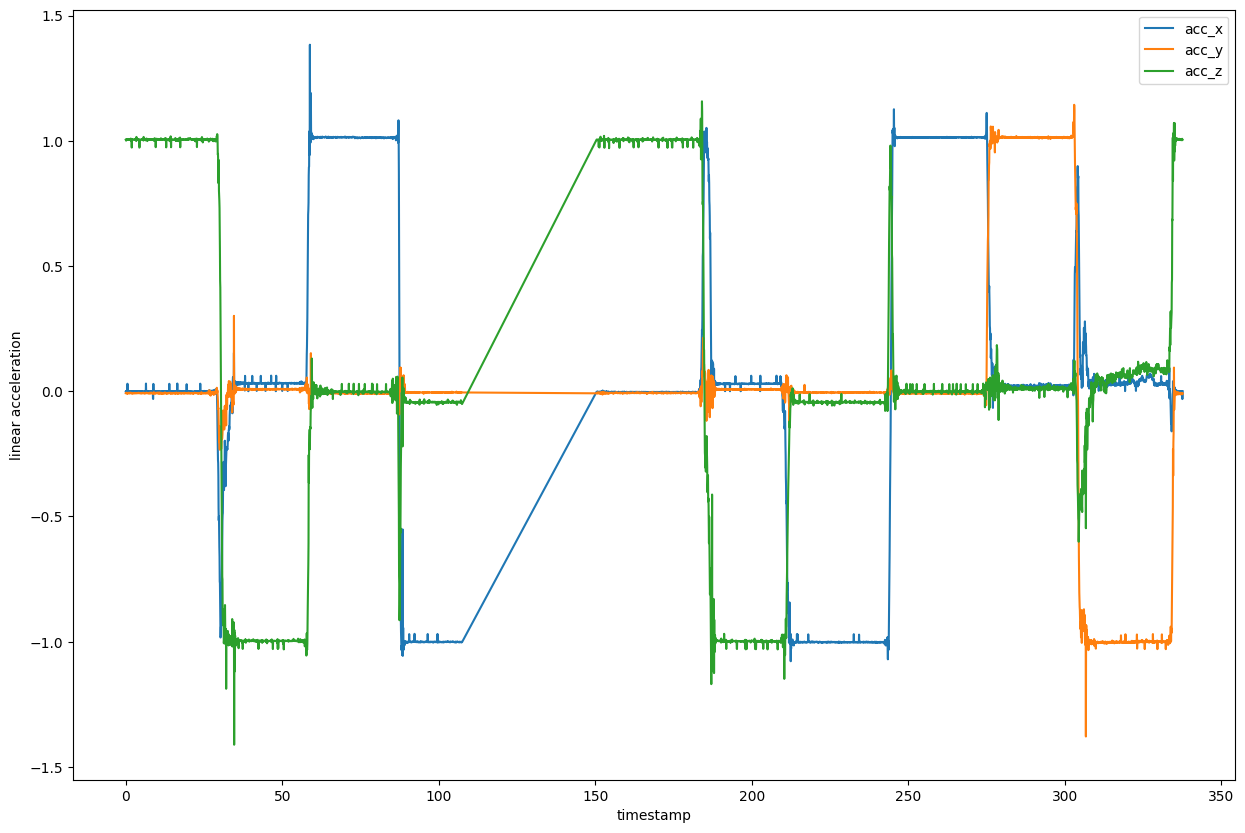

In [13]:
#plot the data
# %matplotlib widget

plot_data(df2)


In [14]:
# plot_pitch_roll(df2)

In [15]:
# plot_data_rest(df2)

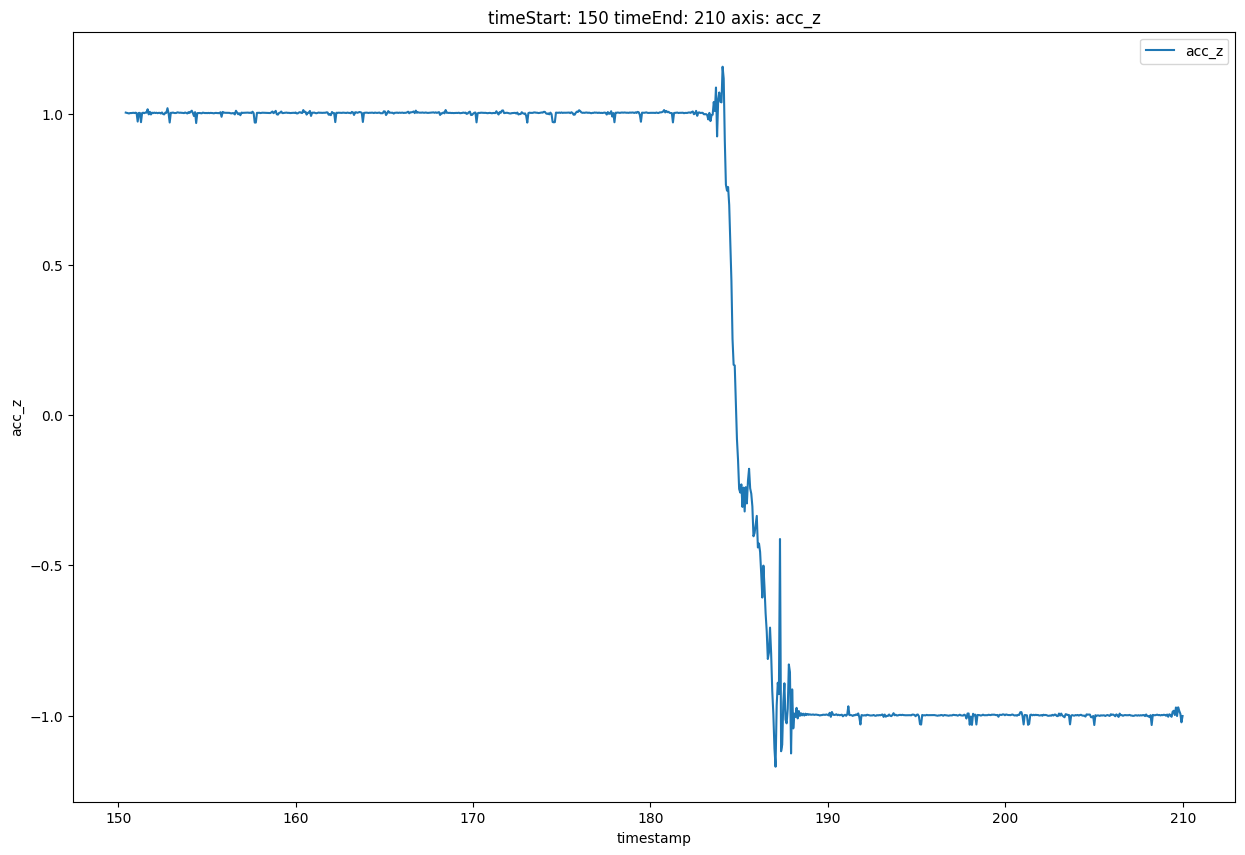

In [16]:
# #when z axis is facing up
# timeStart = 150
# timeEnd = 210
# plt.figure(figsize=(20,10))
# # plt.plot(df2['timestamp'][timeStart:1000],df2['acc_z'][timeStart:1000])
# %matplotlib widget
# plt.plot(df2[(df2['timestamp'] >= 0) & (df2['timestamp'] <= 60)]['timestamp'],df2[(df2['timestamp'] >= 0) & (df2['timestamp'] <= 60)]['acc_z'])

def plotAxis(df,timeStart,timeEnd,axis):
    plt.figure(figsize=(15,10))
    plt.plot(df[(df['timestamp'] >= timeStart) & (df['timestamp'] <= timeEnd)]['timestamp'],df[(df['timestamp'] >= timeStart) & (df['timestamp'] <= timeEnd)][axis])
    plt.xlabel('timestamp')
    plt.ylabel(axis)
    plt.legend([axis])
    plt.title('timeStart: '+str(timeStart)+' timeEnd: '+str(timeEnd)+' axis: '+axis)
    plt.show()

plotAxis(df2,150,210,'acc_z')

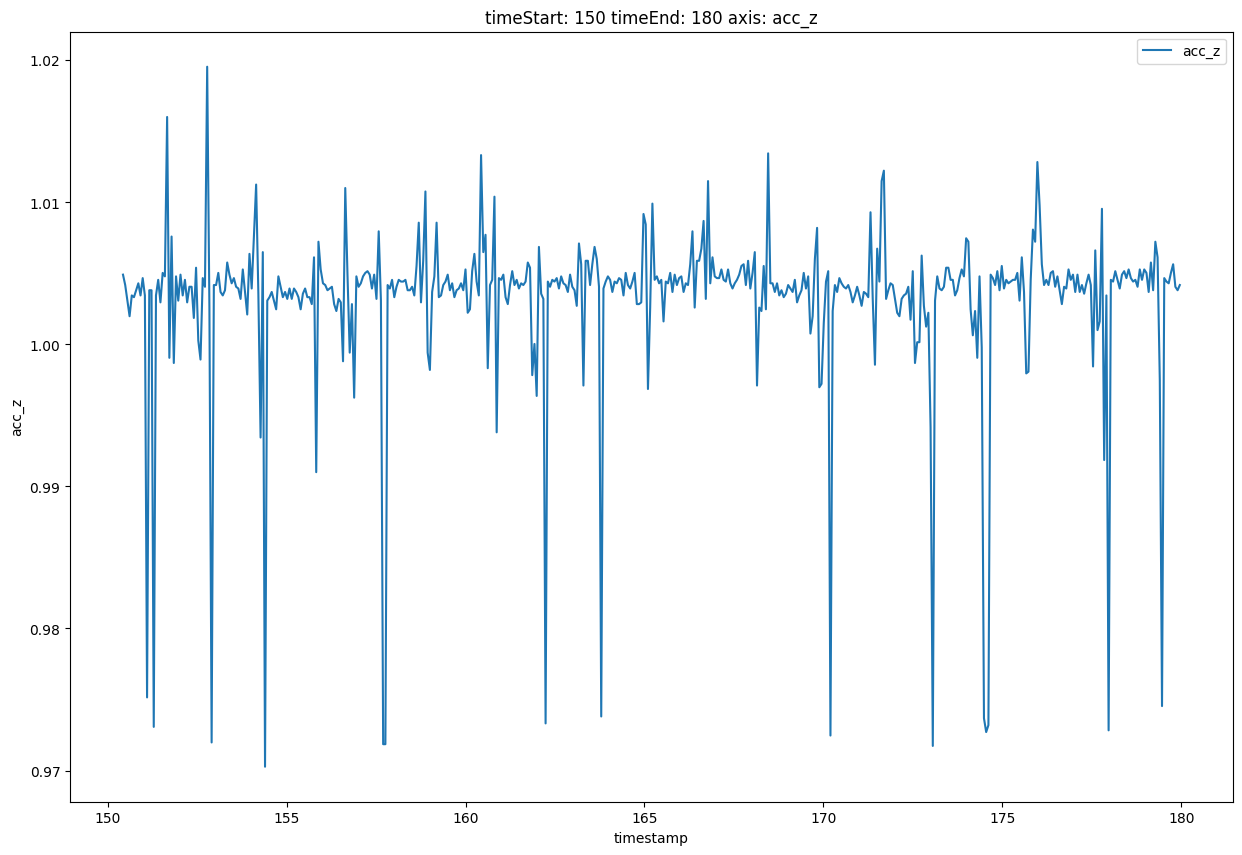

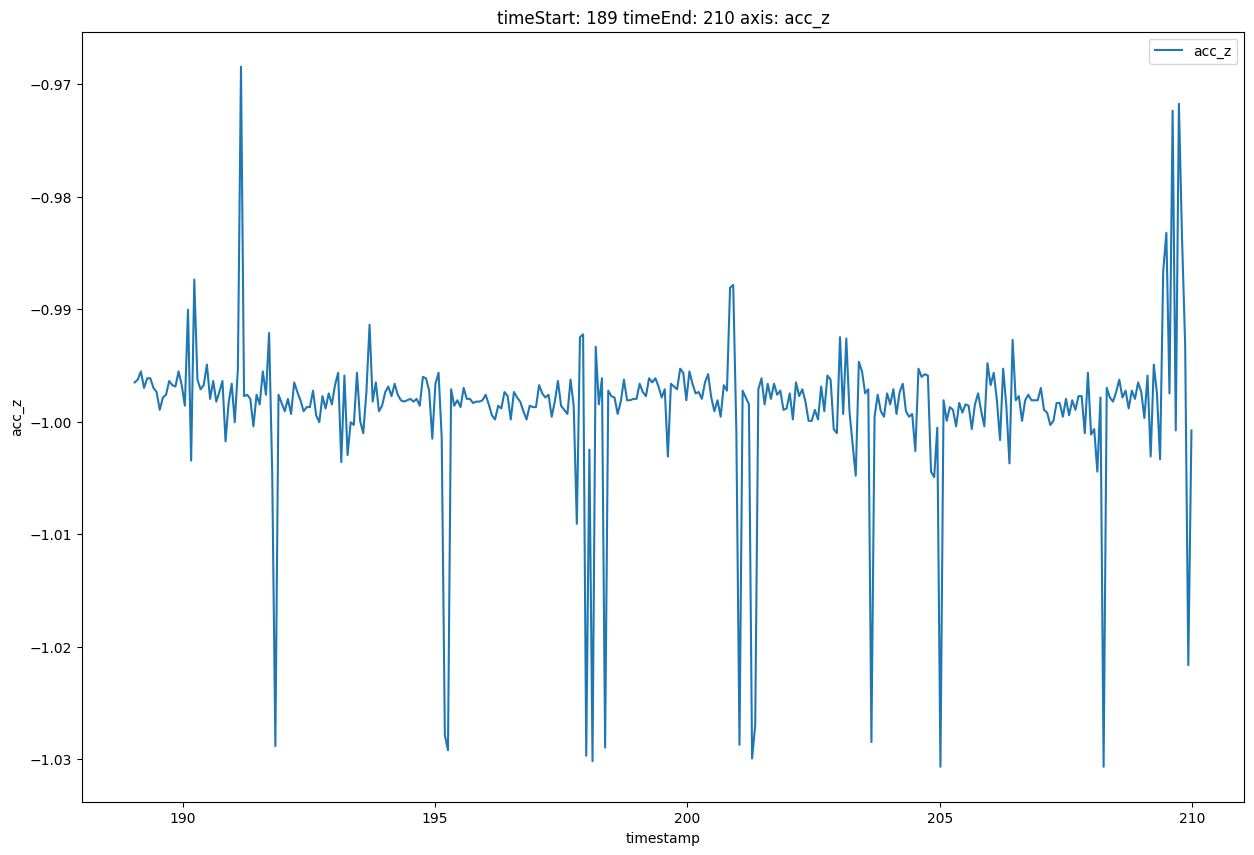

gian of acc_z:  0.10203275448934256
bias of acc_z:  0.00218471207299481


In [17]:
def calculateGian(df,timeStart,timeEnd,timeStart_down,timeEnd_down,axis):
    #plot the data
    plotAxis(df,timeStart,timeEnd,axis)
    plotAxis(df,timeStart_down,timeEnd_down,axis)
    #calculate the mean of the data when the sensor is facing up
    mean_up = df[(df['timestamp'] >= timeStart) & (df['timestamp'] <= timeEnd)][axis].mean()
    #calculate the mean of the data when the sensor is facing down
    mean_down = df[(df['timestamp'] >= timeStart_down) & (df['timestamp'] <= timeEnd_down)][axis].mean()
    #calculate the difference between the two means
    diff = mean_up - mean_down
    #calculate the gian
    gian = diff/(2*9.81)
    #calculate the bias
    bias = (mean_up + mean_down)/2
    return gian,bias

#calculate the gian of acc_z
gian_acc_z,bias_acc_z = calculateGian(df2,150,180,189,210,'acc_z')
print('gian of acc_z: ',gian_acc_z)
print('bias of acc_z: ',bias_acc_z)
    

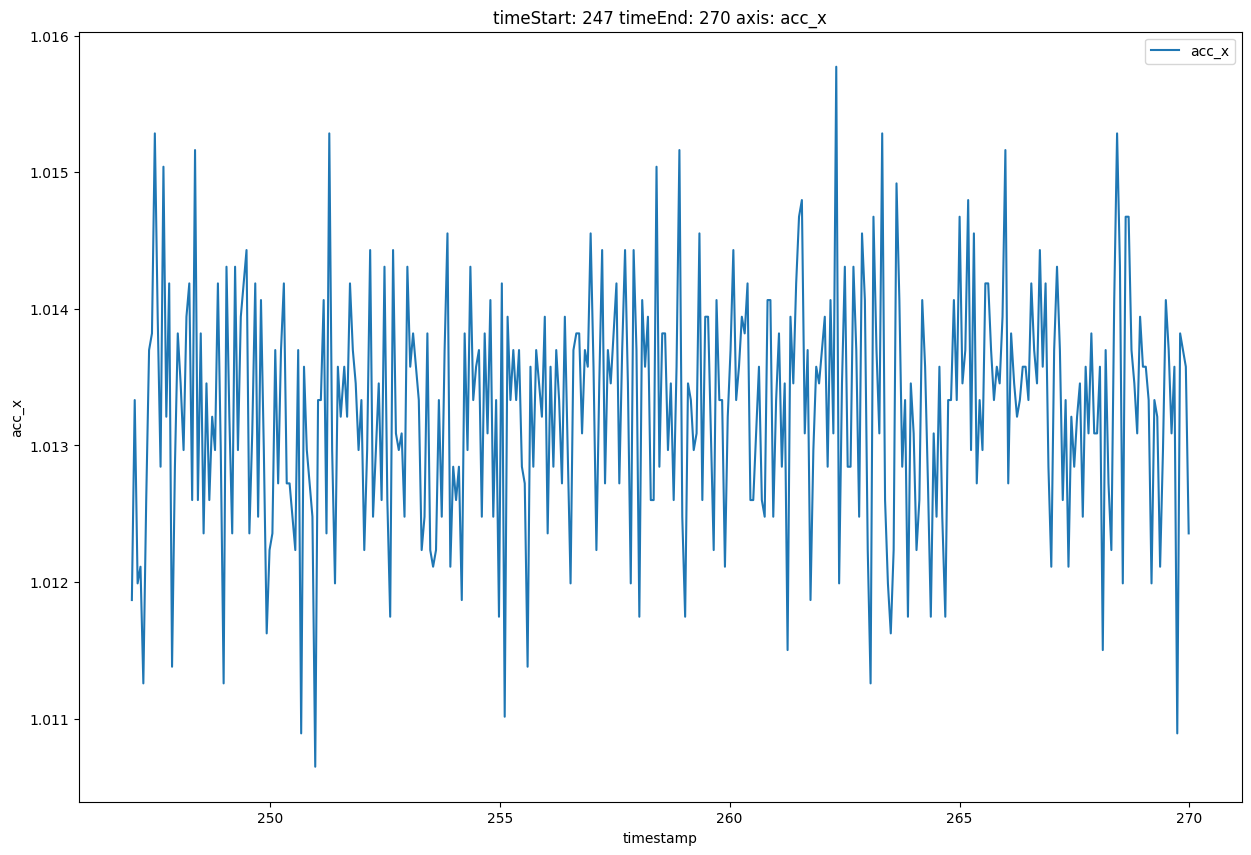

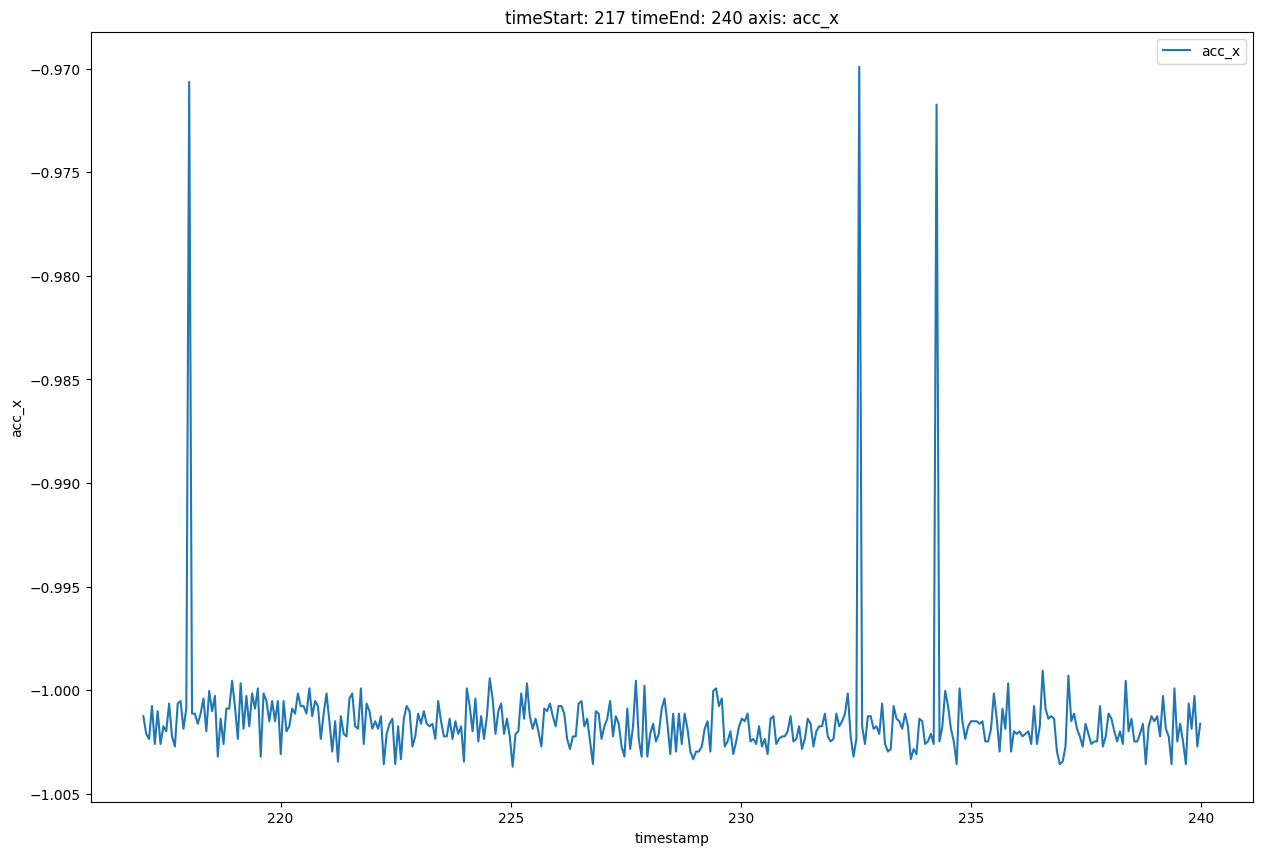

gian of acc_x: 0.10268686255062401
bias of acc_x: 0.005916505405405448


In [18]:
#calculate the gian of acc_x
timeStart = 247
timeEnd = 270
timeStart_down = 217
timeEnd_down = 240
axis = 'acc_x'
gian_acc_x,bias_acc_x = calculateGian(df2,timeStart,timeEnd,timeStart_down,timeEnd_down,axis)
print('gian of acc_x:',gian_acc_x)
print('bias of acc_x:',bias_acc_x)


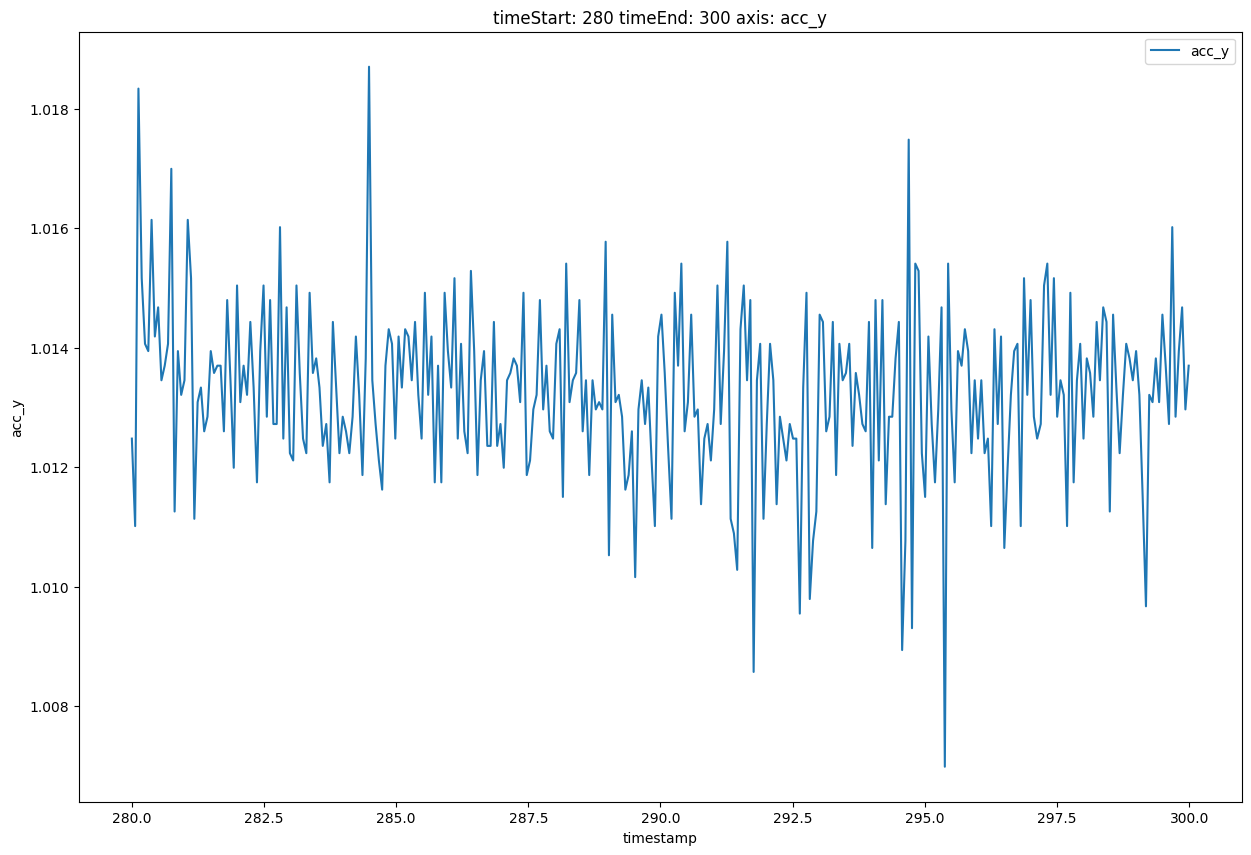

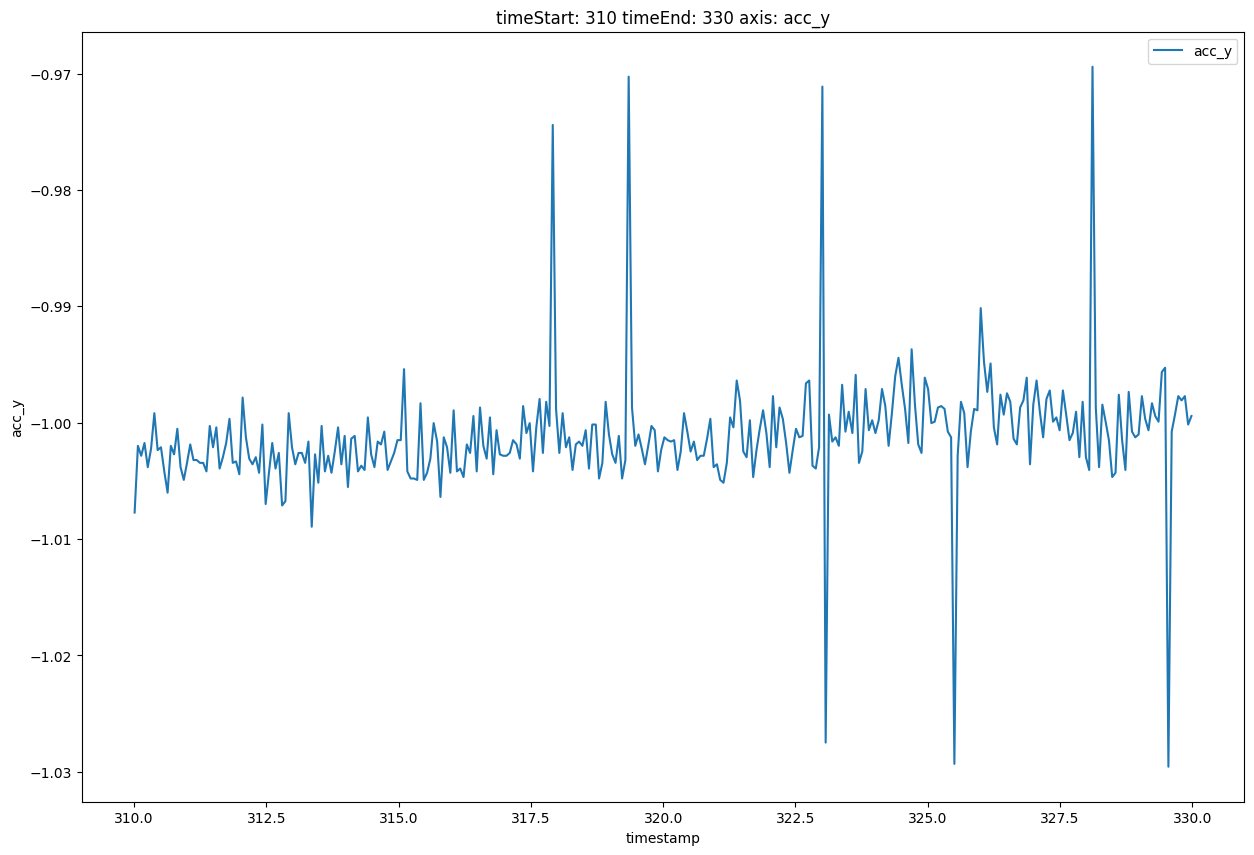

gian of acc_y: 0.10266927491911534
bias of acc_y: 0.006058512422360218


In [19]:
#calculate the gian of acc_y
timeStart = 280
timeEnd = 300
timeStart_down = 310
timeEnd_down = 330
axis = 'acc_y'
gian_acc_y,bias_acc_y = calculateGian(df2,timeStart,timeEnd,timeStart_down,timeEnd_down,axis)
print('gian of acc_y:',gian_acc_y)
print('bias of acc_y:',bias_acc_y)

## Task 3a
Task 3a. There are two columns in the measurement record log file. The first represents the measured distance (in cm) and the second column represents the height (in pixel) measured from the terminal. You need to plot the data as described above and determine the gradient and bias. Write down the results in your report. Note that, you also need to consider the distance of the camera from the surface of the robot. It is provided in readme.txt file with the data for students who use available data.

In [20]:
camaera_log_path = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/showfun/showfun_camera_task3_2_camera.csv'
df3 = pd.read_csv(camaera_log_path)
# df3.columns = ['Time_stamp',]
column_names = [
    'Timestamp_ms',
    'QR_code_number',
    'Center_x_px',
    'Center_y_px',
    'QR_code_width_px',
    'QR_code_height_px',
    'Distance_to_QR_code_cm',
    'QR_code_attitude_deg'
]
df3.columns = column_names
df3

,Timestamp_ms,QR_code_number,Center_x_px,Center_y_px,QR_code_width_px,QR_code_height_px,Distance_to_QR_code_cm,QR_code_attitude_deg
0,1.699625e+09,3,33,-60,370,359,17.270195,3.502686
1,1.699625e+09,3,33,-60,369,359,17.270195,3.502686
2,1.699625e+09,3,34,-60,373,359,17.270195,3.608552
3,1.699625e+09,3,34,-60,372,359,17.270195,3.608552
4,1.699625e+09,3,33,-60,369,360,17.222222,3.502686
...,...,...,...,...,...,...,...,...
395,1.699626e+09,3,-6,52,44,45,137.777778,-0.637620
396,1.699626e+09,3,-6,52,44,44,140.909091,-0.637620
397,1.699626e+09,3,-6,51,44,45,137.777778,-0.637620
398,1.699626e+09,3,-6,51,44,45,137.777778,-0.637620


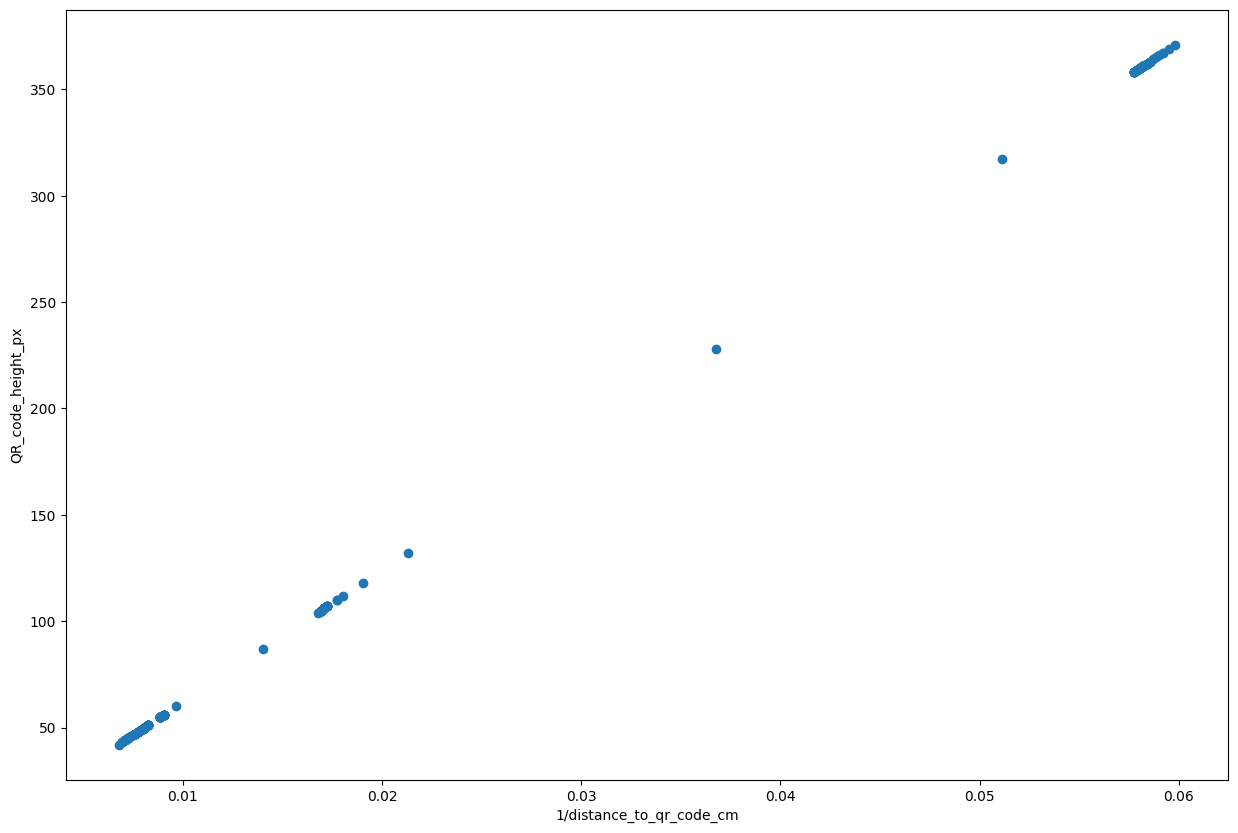

In [21]:
#plot qr_code_height_px and 1/distance_to_qr_code_cm
def plot_qr_code(df):
    plt.figure(figsize=(15,10))
    inverse_distance = 1/df['Distance_to_QR_code_cm']
    plt.scatter(inverse_distance,df['QR_code_height_px'])
    plt.xlabel('1/distance_to_qr_code_cm')
    plt.ylabel('QR_code_height_px')
    

    plt.show()
plot_qr_code(df3)

In [22]:
preSavedData = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/dataset2/data/task3/camera_module_calibration_task3.csv'
df4 = pd.read_csv(preSavedData)
df4.columns = ['Distance_cm','Pixel_height']
# df4.head()
#add 5 + 1.7 cm to the distance
df4['Distance_cm'] = df4['Distance_cm'] + 6.7
df4.head()

,Distance_cm,Pixel_height
0,36.7,185
1,41.7,160
2,46.7,143
3,51.7,128
4,56.7,117


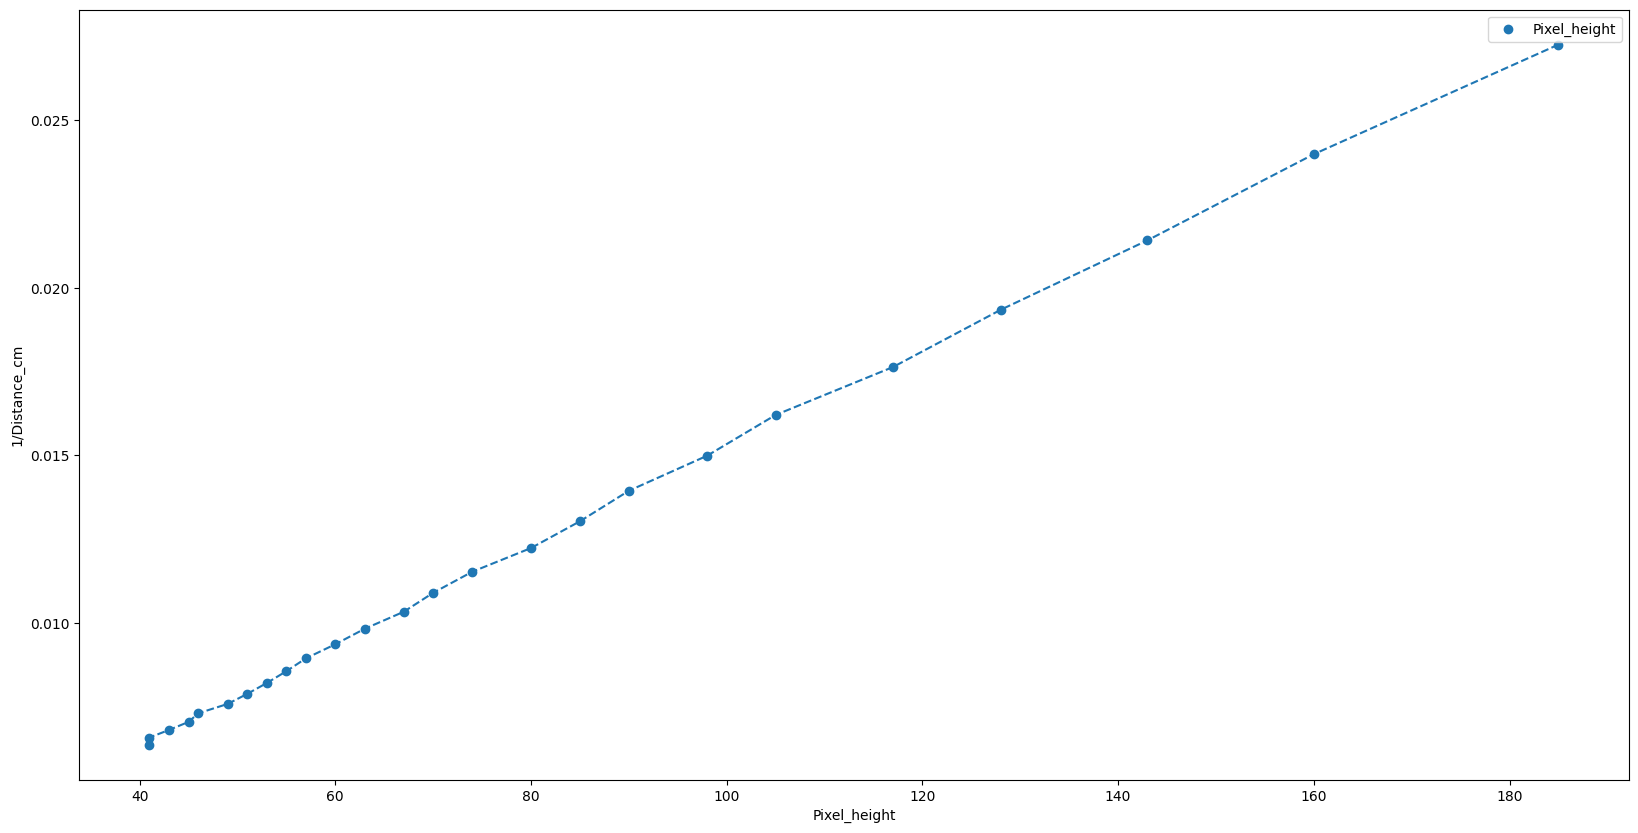

In [23]:
#plot the data
inverted_distance = 1/df4['Distance_cm']
plt.figure(figsize=(20,10))

plt.scatter(df4['Pixel_height'],inverted_distance)
#draw a straight dotted line to show the linear relationship
plt.plot(df4['Pixel_height'],inverted_distance,'--')
plt.xlabel('Pixel_height')
plt.ylabel('1/Distance_cm')
plt.legend(['Pixel_height'])
plt.show()
# plt.plot(df4['Distance_cm'],df4['Pixel_height'])
# plt.xlabel('Distance_cm')
# plt.ylabel('Pixel_height')
# plt.legend(['Pixel_height'])
# plt.show()

In [24]:
#use linear least square to fit the data
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df4['Pixel_height'],inverted_distance)
print('slope: ',slope)



slope:  0.00014591646646737338


In [25]:
# user linear regression to find the slope and intercept
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#convert the data to numpy array
x = np.array(df4['Pixel_height']).reshape((-1,1))
y = np.array(inverted_distance)
# print(x)
# print(y)
# create a linear regression model
model = LinearRegression()
#fit the model
model.fit(x,y)
#predict the y value
y_pred = model.predict(x)
#calculate the mean squared error
mse = mean_squared_error(y,y_pred)
print('mse = ',mse)
#calculate the gradient and bias
print('gradient = ',model.coef_)
print('bias = ',model.intercept_)

mse =  1.6624989570627404e-08
gradient =  [0.00014592]
bias =  0.0005883781659906436


x_3 = h_0 *f/h +d
gradient = h_0 *f
f = gradient/h_0

In [26]:
h0 = 11.5
focusLenght = model.coef_/h0
print('focusLenght = ',focusLenght)
#focusLength in power
focusLengthPower = 1/focusLenght
print('focusLengthPower = ',focusLengthPower)

focusLenght =  [1.26883884e-05]
focusLengthPower =  [78812.21549846]


### Task4 

There are two columns in the measurement record log file. The first represents the distance (in cm) measured from the measuring tape and the second column represents the measured time (in s). You need to determine the speed of the robot. Write down the results in your report. Note that, you need to determine the distance interval from the given log file.


In [61]:
distanceDataset = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/dataset2/data/task4/robot_speed_task4.csv'
recodedDataset = '/workspaces/BasicsOfSensorFusion23_Aalto/Project/Data/showfun/showfun_motor_task4_distance.csv'
df5 = pd.read_csv(recodedDataset,names=['Distance_cm','Time_seconds'])
# df5.columns = ['Distance_cm','Time_seconds']
# df5
# remove time offset
df5['Time_seconds'] = df5['Time_seconds'] - df5['Time_seconds'][0]
#convert the distance to meter
df5['Distance_cm'] = df5['Distance_cm']/100
df5



,Distance_cm,Time_seconds
0,0.0,0.00
1,0.4,5.85
2,0.8,11.74
3,1.2,17.71
4,1.6,23.33
5,2.0,29.37


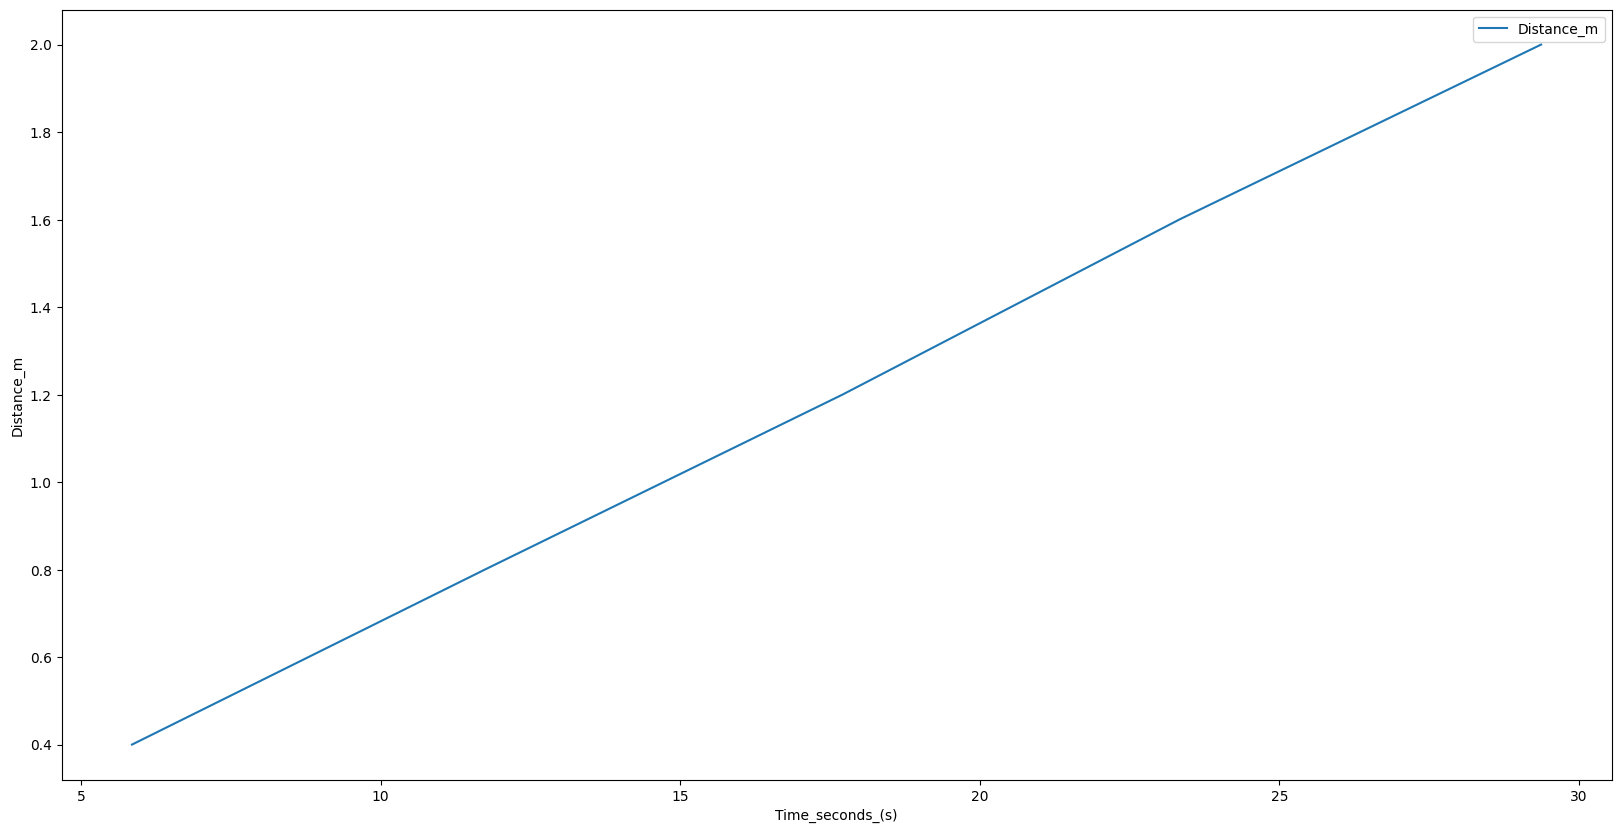

In [66]:
#sum the time
# df5['Time_seconds'] = df5['Time_seconds'].cumsum()

#plot the data
plt.figure(figsize=(20,10))
plt.plot(df5['Time_seconds'],df5['Distance_cm'])
plt.xlabel('Time_seconds_(s)')
plt.ylabel('Distance_m')
plt.legend(['Distance_m'])
plt.show()

velocity =  2    0.068143
3    0.067758
4    0.068581
5    0.068097
dtype: float64


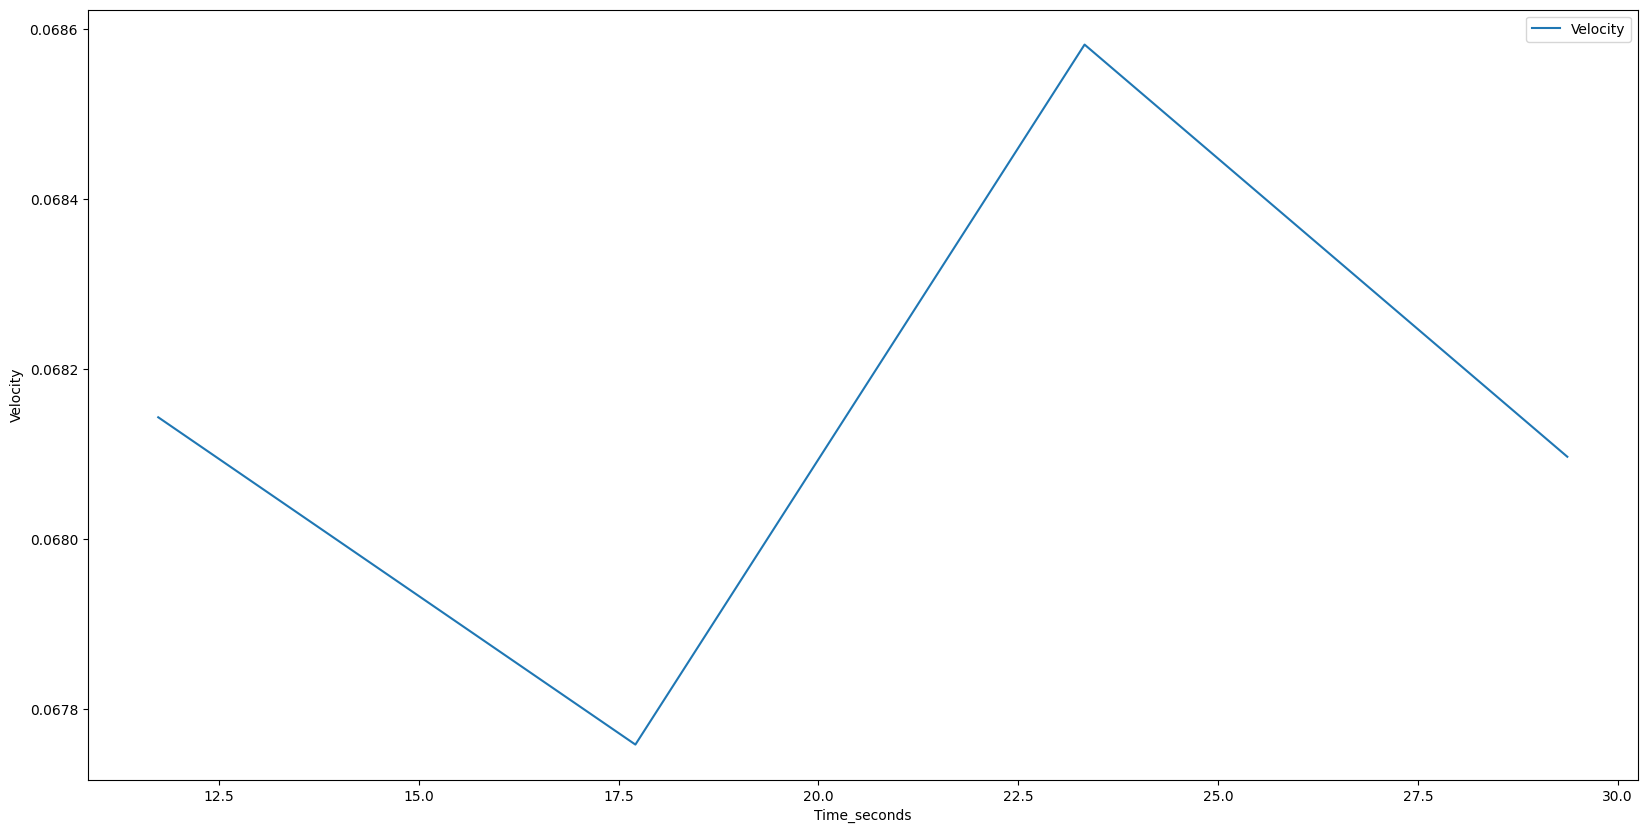

In [67]:
#remove fist entry to prevent division by zero
df5 = df5.drop(df5.index[0])

#calculate the velocity
velocity = df5['Distance_cm']/df5['Time_seconds']
print('velocity = ',velocity)
#plot the velocity
plt.figure(figsize=(20,10))
plt.plot(df5['Time_seconds'],velocity)
plt.xlabel('Time_seconds')
plt.ylabel('Velocity')
plt.legend(['Velocity'])
plt.show()

In [64]:
print('velocity = ',velocity.mean())

velocity =  0.06819108414292575
